Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head(60)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.tail(60)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
940,308,47,720356,16-09-2013,OH,100/300,1000,1013.61,6000000,452349,...,YES,5590,860,860,3870,Suburu,Impreza,2002,N,NaN
941,284,48,724752,16-05-2008,IL,500/1000,500,958.30,0,464646,...,?,46860,8520,8520,29820,Volkswagen,Passat,1998,N,NaN
942,108,31,148498,04-01-2002,IN,250/500,2000,1112.04,6000000,472209,...,NO,4290,780,780,2730,Volkswagen,Passat,1998,N,NaN
943,421,57,110122,02-04-2002,IN,250/500,2000,1206.26,0,459955,...,NO,78500,15700,7850,54950,Audi,A3,2015,N,NaN
944,266,42,281388,16-07-1998,IL,500/1000,1000,763.67,0,473389,...,YES,70830,7870,7870,55090,Jeep,Grand Cherokee,2005,N,NaN
945,412,56,728600,15-08-2002,IL,250/500,500,1042.56,0,616767,...,NO,68040,15120,7560,45360,Suburu,Forrestor,1997,N,NaN
946,31,32,231548,07-09-1999,IL,100/300,2000,1263.48,4000000,442948,...,?,63600,5300,10600,47700,Audi,A5,1997,Y,NaN
947,465,63,531160,12-01-2012,IL,250/500,500,1006.99,6000000,458936,...,?,43560,4840,4840,33880,Suburu,Legacy,2015,N,NaN
948,126,31,889003,18-08-1996,OH,250/500,1000,1328.26,0,613921,...,NO,60840,13520,6760,40560,Suburu,Forrestor,2011,N,NaN
949,407,55,193213,11-03-1996,OH,100/300,1000,1250.08,5000000,474598,...,YES,68160,11360,11360,45440,Ford,Escape,2010,N,NaN


In [7]:
df.shape

(1000, 40)

In [8]:
 df_1=df.drop(columns=['_c39'],axis=1)

We drop the "_c39" column because there are all value have NaN.

In [9]:
df_1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
df_1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# checking datatypes of the columns

In [11]:
df_1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

we can observe that the 'fraud_reported' has continuous data but it is an object type. let us handle this column.

In [12]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [13]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [14]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [15]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [16]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [17]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [18]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [19]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [20]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [21]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [22]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [23]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [24]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [25]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [26]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [27]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [28]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [29]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [30]:
df['fraud_reported'].nunique()

2

In [31]:
df_1.shape

(1000, 39)

In [32]:
df_1.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Converting the column type from object to float

# Making DataFrame for the Nominal Data¶

In [33]:
df_visualization_nominal = df[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']].copy()

In [34]:
df_visualization_nominal.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Visualization of the Data

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns

In [35]:
import seaborn as sns

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


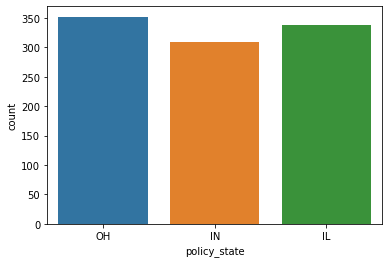

In [36]:
ax=sns.countplot(x='policy_state',data=df_visualization_nominal)
print(df_visualization_nominal['policy_state'].value_counts())

the fraud persion in OH state is 352,IL state is 338 and IN state is 310.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


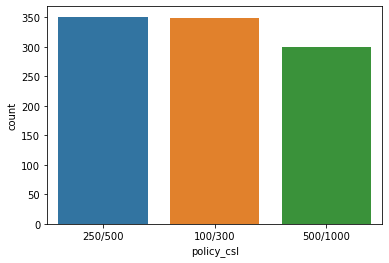

In [37]:
ax=sns.countplot(x='policy_csl',data=df_visualization_nominal)
print(df_visualization_nominal['policy_csl'].value_counts())

According to policy_csl fraud persion are 351 in 250/500 and 349 in 100/300 and 300 in 500/1000.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


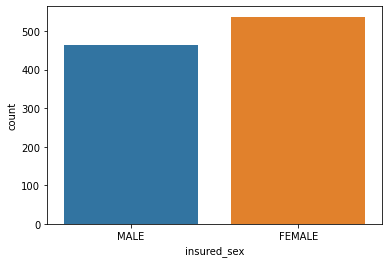

In [38]:
ax=sns.countplot(x='insured_sex',data=df_visualization_nominal)
print(df_visualization_nominal['insured_sex'].value_counts())

According to sex female praud is 537 and male fraud is 463.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


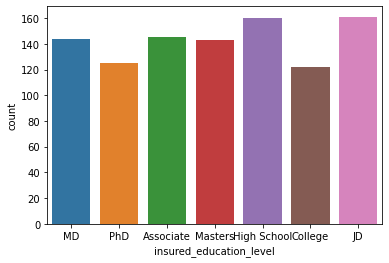

In [39]:
ax=sns.countplot(x='insured_education_level',data=df_visualization_nominal)
print(df_visualization_nominal['insured_education_level'].value_counts())

Fraud in education JD have 161 persion and High school have 160 persion and Associate have 145 persion and MD have 144 persion Masters have 143 persion Phd have 125 persion and college have 122 persion

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


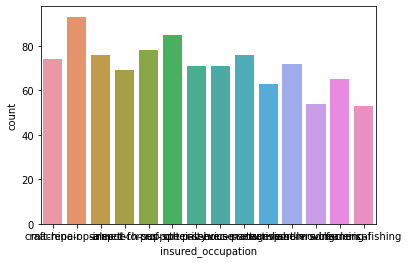

In [40]:
ax=sns.countplot(x='insured_occupation',data=df_visualization_nominal)
print(df_visualization_nominal['insured_occupation'].value_counts())

Fraud in occupation are in machine-op-inspct 93 and in prof-specialty 85 and in tech-support 78 and in sales 76 and in exec-managerial 76 and in craft-repair 74 and in transport-moving 72 and in other-service 71 and in priv-house-serv 71 and in armed-forces 69 and in adm-clerical 65 and in protective-serv 63 and in handlers-cleaners 54 and farming-fishing 53 persion fraud

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


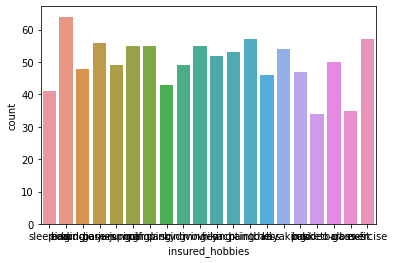

In [41]:
ax=sns.countplot(x='insured_hobbies',data=df_visualization_nominal)
print(df_visualization_nominal['insured_hobbies'].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


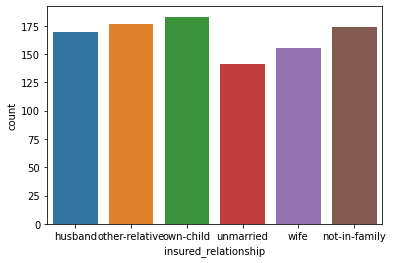

In [42]:
ax=sns.countplot(x='insured_relationship',data=df_visualization_nominal)
print(df_visualization_nominal['insured_relationship'].value_counts())

Relationship fraud  in own chid are 183 and other relative are 177 and not in family are 174 and husband are 170 and wife are 155 and unmarried are 141.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


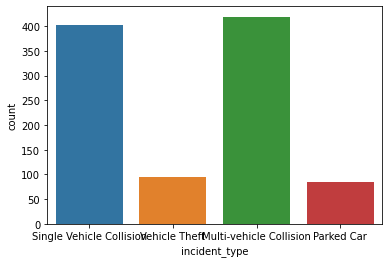

In [43]:
ax=sns.countplot(x='incident_type',data=df_visualization_nominal)
print(df_visualization_nominal['incident_type'].value_counts())

incident type fraud are in Multi-vehicle Collision-419 and in Single Vehicle Collision-403 and in Vehicle Theft-94 and in Parked Car-84.

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


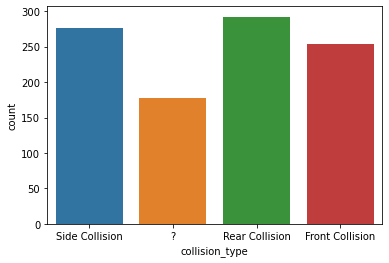

In [44]:
ax=sns.countplot(x='collision_type',data=df_visualization_nominal)
print(df_visualization_nominal['collision_type'].value_counts())

fraud of persion in collision  Rear Collision- 470 ,Side Collision-276,Front Collision-254.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


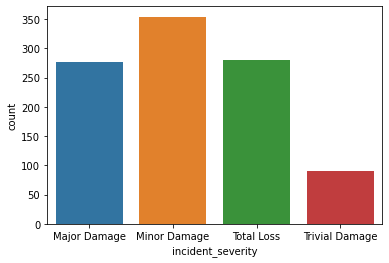

In [45]:
ax=sns.countplot(x='incident_severity',data=df_visualization_nominal)
print(df_visualization_nominal['incident_severity'].value_counts())

fraud in Minor Damage are 354 and Total Loss are 280 and Major Damage are 276 and Trivial Damage are 96.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


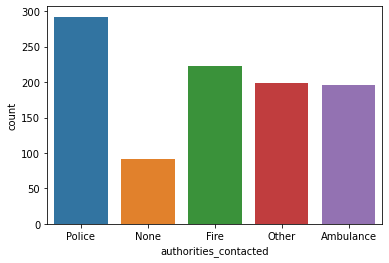

In [46]:
ax=sns.countplot(x='authorities_contacted',data=df_visualization_nominal)
print(df_visualization_nominal['authorities_contacted'].value_counts())

the no of persion in authorities_contacted for fraud are
Police -292
Fire -223
Other-198
Ambulance-196
None-91

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


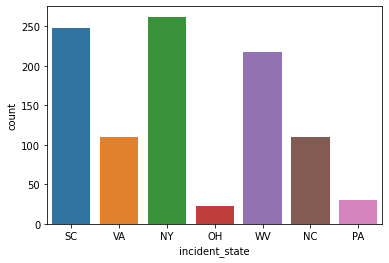

In [47]:
ax=sns.countplot(x='incident_state',data=df_visualization_nominal)
print(df_visualization_nominal['incident_state'].value_counts())

the no of persion in  incident_state are  
NY-262
SC-248
WV-217
VA-110
NC-110
PA-30
OH-2.3

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


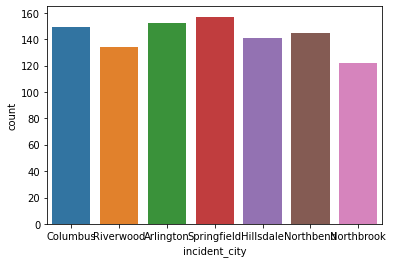

In [48]:
ax=sns.countplot(x='incident_city',data=df_visualization_nominal)
print(df_visualization_nominal['incident_city'].value_counts())

the no of persion in incident_city are
 Springfield -157
 Arlington-152
 Columbus-149
 Northbend-145
 Hillsdale-141
 Riverwood-134
 Northbrook-122

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


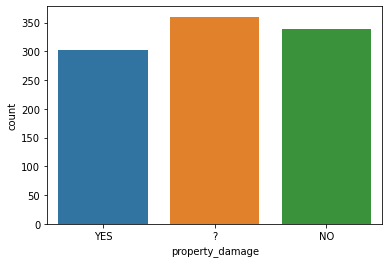

In [49]:
ax=sns.countplot(x='property_damage',data=df_visualization_nominal)
print(df_visualization_nominal['property_damage'].value_counts())

the no of persion in property_damage are 
? -360
NO -338
YES -302.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


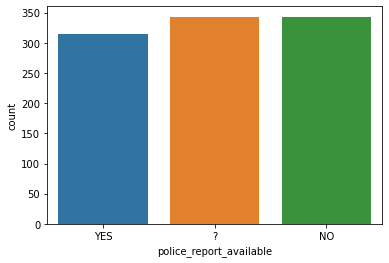

In [50]:
ax=sns.countplot(x='police_report_available',data=df_visualization_nominal)
print(df_visualization_nominal['police_report_available'].value_counts())

the no of persion in police_report_available are
 ?-343
 NO-343
 YES-314

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


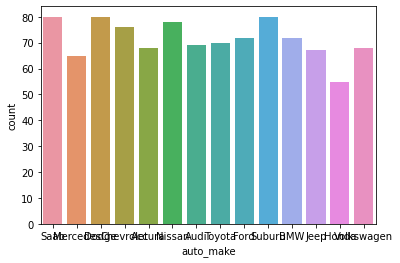

In [51]:
ax=sns.countplot(x='auto_make',data=df_visualization_nominal)
print(df_visualization_nominal['auto_make'].value_counts())

the no of persion in auto_make are
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


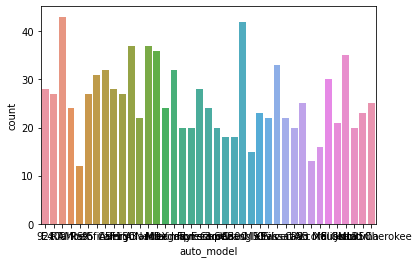

In [52]:
ax=sns.countplot(x='auto_model',data=df_visualization_nominal)
print(df_visualization_nominal['auto_model'].value_counts())

the no of persion in auto_model are 
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12

# Making DataFrame of the ordinal data

In [53]:
df_visualization_ordinal=df[["policy_bind_date","policy_number"]].copy()

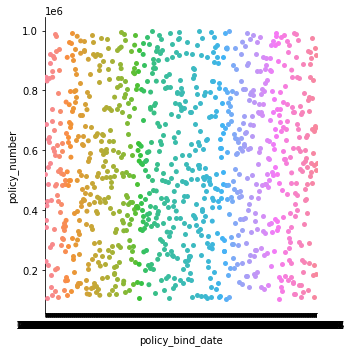

In [54]:
sns.catplot(x="policy_bind_date",y="policy_number",data=df_1)

# Encoding of DataFrame:

In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [56]:
for i in df_1.columns:
    if df_1[i].dtypes=='object':
        df_1[i]=enc.fit_transform(df_1[i].values.reshape(-1,1))

In [57]:
df_1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


<AxesSubplot:>

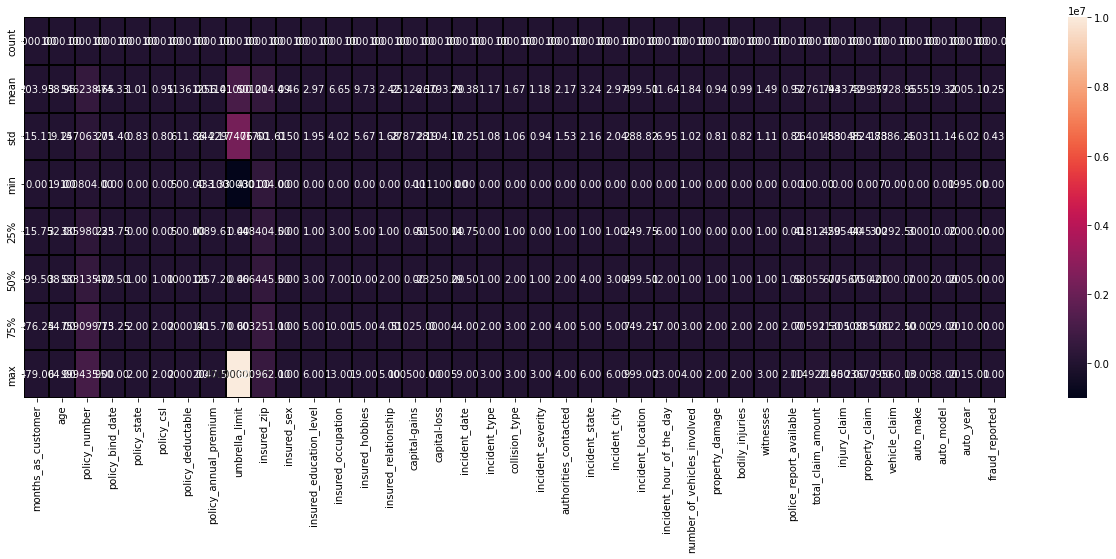

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df_1.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [59]:
df_1.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544


<AxesSubplot:>

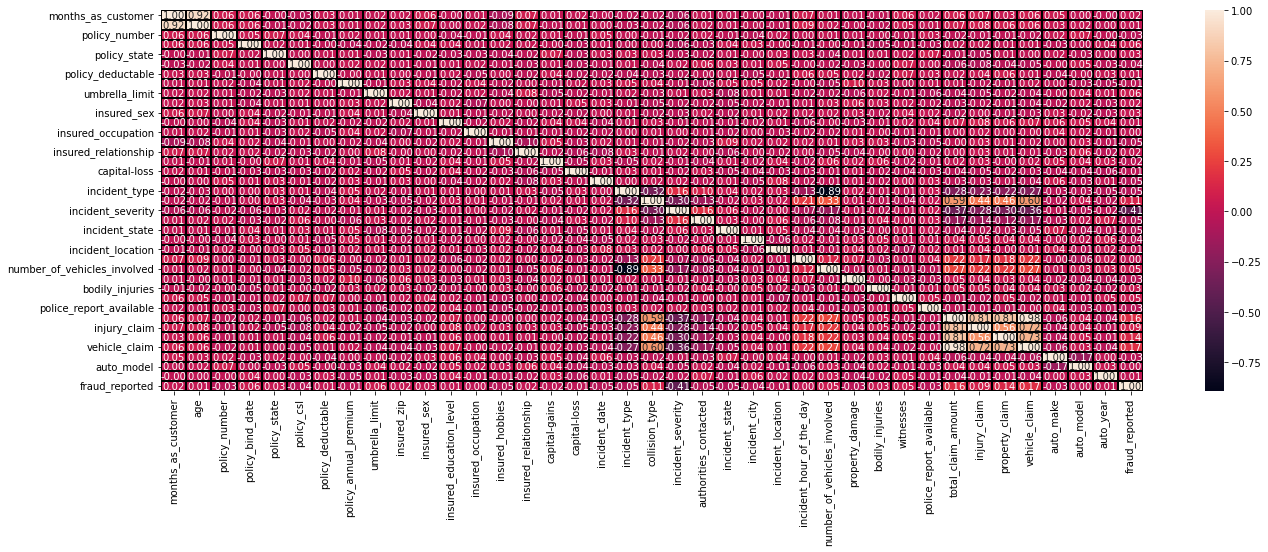

In [60]:
plt.figure(figsize=(22,7))
sns.heatmap(df_1.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Checking the columns which are positively and negative correlated with the target columns

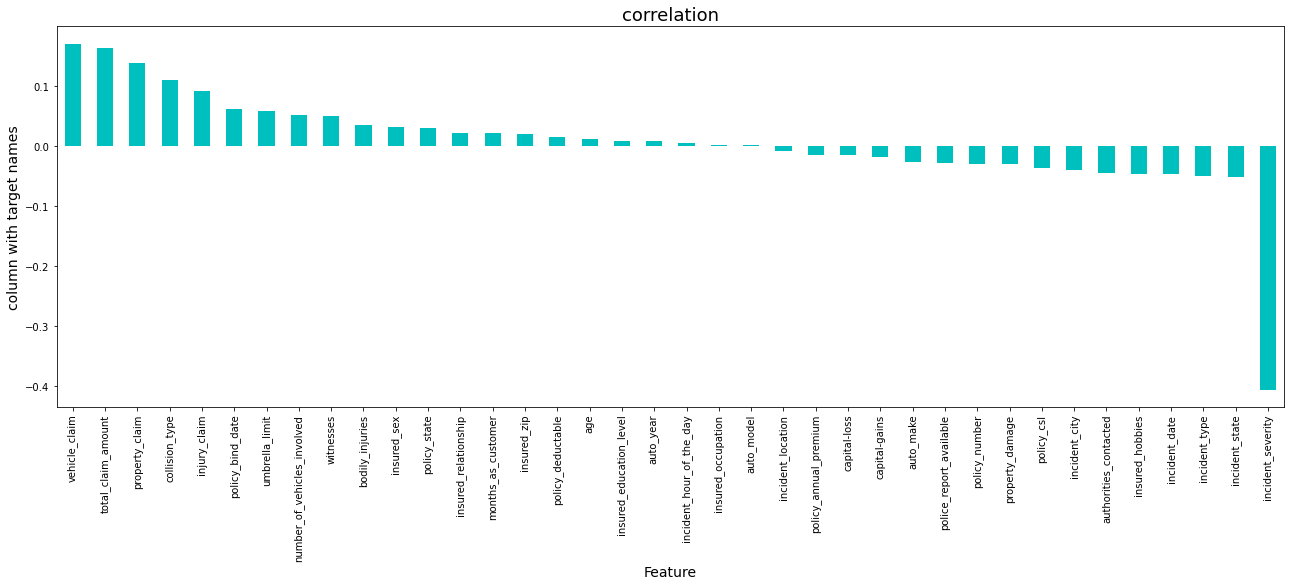

In [61]:
plt.figure(figsize=(22,7))
df_1.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [62]:
df_1.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


# keeping +/-0.5 as the range for skewness,here are the columns which does not lie with in this range. umbrella_limit- Categorical. insured_zip-Categorical. total_claim_amount-Categorical. vehicle_claim-Categorical. fraud_reported-target variable. 

Since no column has skewness,we will not treat that.

# Outliers Check:

In [63]:
df_1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

Checking the outliers on the int and float type of columns.

<AxesSubplot:>

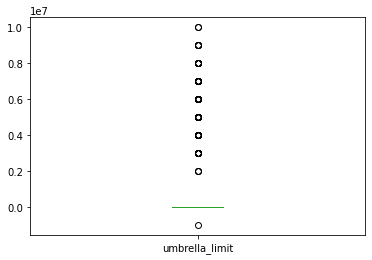

In [64]:
df_1['umbrella_limit'].plot.box()

<AxesSubplot:>

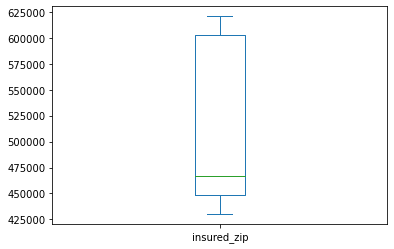

In [65]:
df_1['insured_zip'].plot.box()

<AxesSubplot:>

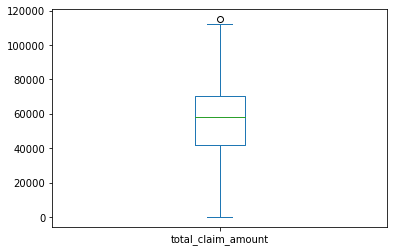

In [66]:
df_1['total_claim_amount'].plot.box()

<AxesSubplot:>

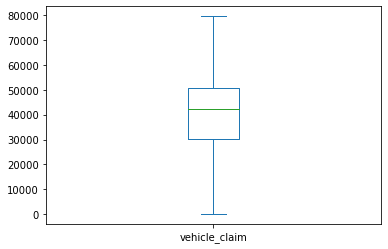

In [67]:
df_1['vehicle_claim'].plot.box()

# Considering the outlier remove.

In [68]:
df_1.shape

(1000, 39)

In [69]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_1))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [70]:
df_new_z=df_1[(z<3).all(axis=1)]
df_new_z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [71]:
df_new_z.shape

(980, 39)

# percentage loss of data:

In [72]:
Data_loss = ((1000-980)/1000)*100

In [73]:
Data_loss

2.0

our data becoming biased as it is not considering the case of total_claim_amount.thus, we will not remove outliers.

# Separating the columns into features and targets:

In [74]:
features=df_1.drop('fraud_reported',axis=1)
target=df_1['fraud_reported']

# Scaling the data using min-max Scaler:

In [75]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
for i in range (0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.19289858192084508
At random state 0,the testing accuracy is:- 0.1491248536271892


At random state 1,the training accuracy is:- 0.18428624951033368
At random state 1,the testing accuracy is:- 0.1979197138345944


At random state 2,the training accuracy is:- 0.18282109567262383
At random state 2,the testing accuracy is:- 0.18429110895182865


At random state 3,the training accuracy is:- 0.1832635994541637
At random state 3,the testing accuracy is:- 0.19394137323671012


At random state 4,the training accuracy is:- 0.18370558539030668
At random state 4,the testing accuracy is:- 0.1572613164716138


At random state 5,the training accuracy is:- 0.20251027193800064
At random state 5,the testing accuracy is:- 0.10731245118698829


At random state 6,the training accuracy is:- 0.2090251702525351
At random state 6,the testing accuracy is:- 0.07651961380268102


At random state 7,the training accuracy is:- 0.20075087706849293
At random state 7,the t

In [78]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [79]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [80]:
pred_test=lr.predict(features_test)

In [81]:
print(r2_score(target_test,pred_test))

0.17761395585189443


# Cross-validation of the model

In [82]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.09154332261462667 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 3 the cv score is 0.062058865964057554 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 4 the cv score is 0.1016188966123491 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 5 the cv score is 0.1089426846489425 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 6 the cv score is 0.10423293136668572 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 7 the cv score is 0.10957598722718895 and accuracy score for training is -0.22228749384321977 and accuracy for the testing is 0.17761395585189443


At cross fold 8 the cv score 

Since the number of fold do not have such impact on the accuracy and cv_score. so cv=5 is selected.

Here we have handled the problem of overfitting and checking the training and testing score.

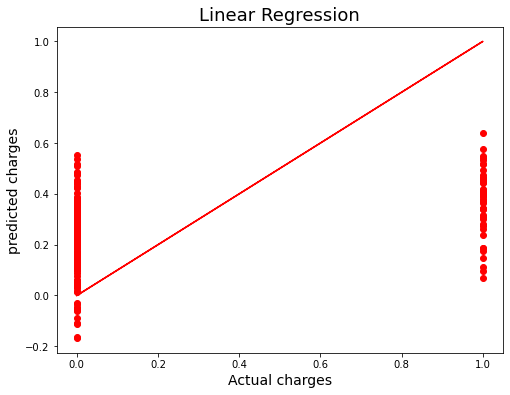

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color="r")
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the data points which shows good fit of our model.

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.001, .01, .1, 1, 10, 100],
              'random_state': list(range(0,10))}

ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [86]:
ls  = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

4.626095427424504

In [87]:
pred_ls = ls.predict(features_test)

In [88]:
lss=r2_score(target_test,pred_ls)
lss*100

-0.06550079681868493

In [89]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

0.659691941195546

# Ensemble technique:

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'auto'}


In [91]:
rf =RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 52.13870614035088
Cross Val Score: 39.885058441930774


# We are getting model accuracy and cross validation both as 39.15 which shows our model is not performing extremely well

In [92]:
import pickle
filename = 'fraud_reported.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Conclusion

In [93]:
loaded_model = pickle.load(open('fraud_reported.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

52.13870614035088


In [94]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["predicted","Orginal"])

In [95]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
predicted,0.02,0.0,0.19,0.0,0.27,0.01,0.0,0.01,0.0,0.12,...,0.0,0.01,0.0,0.23,0.6,0.06,0.1,0.01,0.03,0.53
Orginal,0.02,0.0,0.19,0.0,0.27,0.01,0.0,0.01,0.0,0.12,...,0.0,0.01,0.0,0.23,0.6,0.06,0.1,0.01,0.03,0.53
